# Image Matrix

The `image_matrix()` function arranges a set of images in a grid.

Dimensions of the grid are determined by the shape of the input Numpy 2D array.

Each element of the input 2D array is an 2D or 3D Numpy array itself specifying either a grayscale image (2D array) 
or a color RGB(A) image (3D array).

For more information on image arrays please see the documentation of `geom_imshow()` function.

The `image_matrix()` function uses `geom_imshow()` under the hood, so you may want to check these demos as well:

 - [image_101.ipynb](https://nbviewer.org/github/JetBrains/lets-plot-docs/blob/master/source/examples/cookbook/image_101.ipynb)
 - [image_fisher_boat.ipynb](https://nbviewer.org/github/JetBrains/lets-plot-docs/blob/master/source/examples/cookbook/image_fisher_boat.ipynb)

In [1]:
import numpy as np
from lets_plot import *
from lets_plot.bistro.im import image_matrix

LetsPlot.setup_html()

In [2]:
# Load image file.
from PIL import Image
import requests
from io import BytesIO

response = requests.get('https://github.com/JetBrains/lets-plot-docs/raw/master/source/examples/cookbook/images/fisher_boat.png')
image = Image.open(BytesIO(response.content))
img = np.asarray(image)
img.shape


(225, 225, 3)

### Create 2 x 3 grid of images

Use the same image to fill the array elements.

In [3]:
M = 2  # rows
N = 3  # columns
X = np.empty([M, N], dtype=object)
X.fill(img)

### Display images in 2 x 3 grid


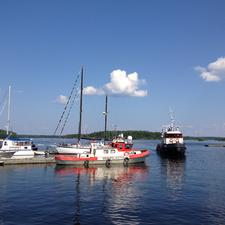
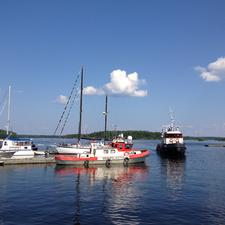
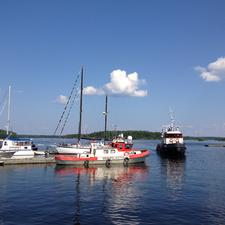
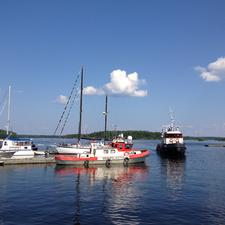
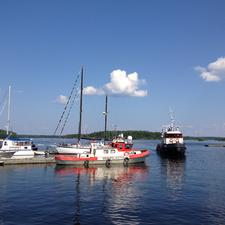
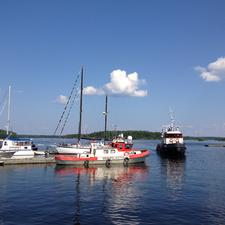

In [4]:
image_matrix(X)

### Images in the grid can be of different sizes


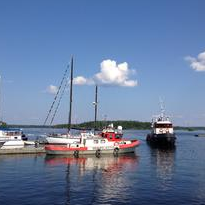
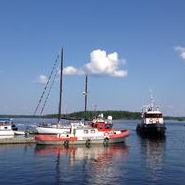
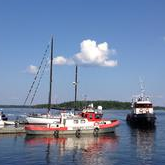
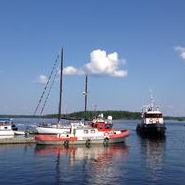
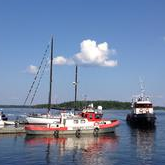
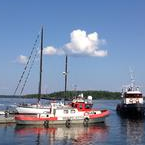

In [5]:
# Lets vary size of images in the matrix
X1 = np.empty([M, N], dtype=object)
for row in range(M):
    for col in range(N):
        v = (row + col + 1) * 10
        X1[row][col] = img[v:-v,v:-v,:]

image_matrix(X1)

### Normalization of grayscale image

By default, luminance values in grayscale image will be scaled to [0-255] range using a linear scaler.

In [6]:
# Generate a grayscale image from an RGB image 
# by selecting only one `R` channel:
img_gs = img[:,:,0]

img_gs.dtype

dtype('uint8')

For the demo purposes we will reduce the range of data in some of the images.


In [7]:
def _degrade(grayscale_img:np.ndarray, coef:float):
    vmin = grayscale_img.min()
    vmax = grayscale_img.max()
    middle = vmin + (vmax - vmin) / 2

    rows, cols = grayscale_img.shape
    for row in range(rows):
        for col in range(cols):
            v = float(grayscale_img[row][col])
            v_new = middle + (v - middle) * coef
            grayscale_img[row][col] = int(v_new)


Now lets fill an 2D array with images, applying the `_degrade()` function on each iteration. 

The last image added is the one "degraded" the most.

In [8]:
X2 = np.empty([M, N], dtype=object)
img_copy = img_gs.copy()
for row in range(M):
    for col in range(N):
        X2[row][col] = img_copy
        img_copy = img_copy.copy()
        _degrade(img_copy, coef=.7)
        print("[{}, {}] data range: [{}-{}]".format(row, col, img_copy.min(), img_copy.max()))



[0, 0] data range: [38-216]
[0, 1] data range: [64-189]
[0, 2] data range: [82-170]
[1, 0] data range: [95-156]
[1, 1] data range: [104-146]
[1, 2] data range: [110-139]


### Display images in grid with normalization (default)


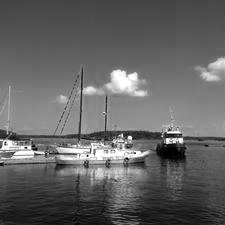
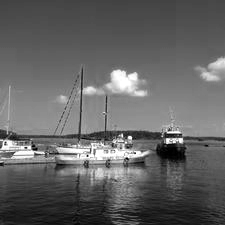
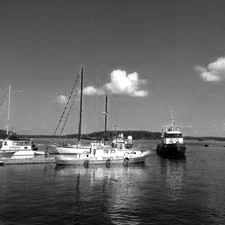
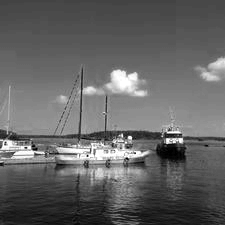
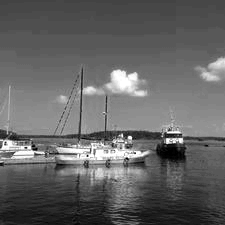
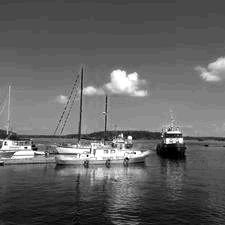

In [9]:
image_matrix(X2)


### Display images in grid with NO normalization



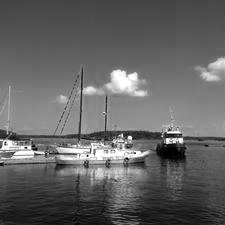
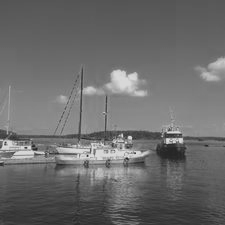
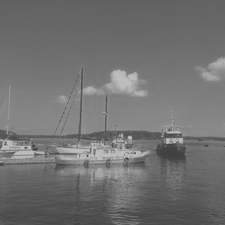
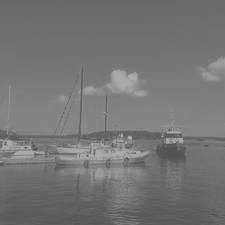
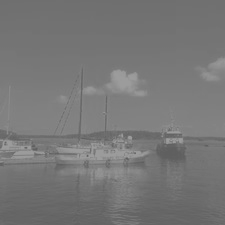
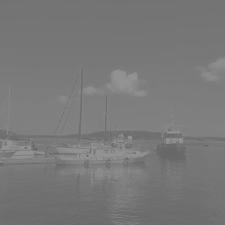

In [10]:
image_matrix(X2, norm=False)

### Scaling image size

In case the image size is too small or too big to show, the displayed dimensions can be changed using the parameter `scale`.

For example,`digits` dataset from `sklearn` package contains very small 8x8 pictures of digits. 

In [11]:
# Load `digits` form sklearn.
from sklearn.datasets import load_digits
digits_bunch = load_digits()
digits_data = digits_bunch.data

In [12]:
# Create 4x4 ndarray containing the first 16 digits in from `digits` dataset. 
cols = 4
rows = 4
X4 = np.empty((rows, cols), dtype=object)
for row in range(rows):
    for col in range(cols):
        i = row * cols + col;
        digit_data = digits_data[i]
        digit_img = digit_data.reshape(8, 8)
        X4[row][col] = digit_img

In [13]:
X4[0][0].shape

(8, 8)

In [14]:
# NOTE: minimal plot size in Lets-Plot is 50x50 px.
#       thus we actually don't see 8x8 images in their native dimensions here. 
image_matrix(X4)

### Scale Up

Each digit image is 8x8 px. Multiply by 15 to see 120x120 px images.

In [15]:
image_matrix(X4, scale=15)

### Scale Down

Use values < 1. to see smaller images.


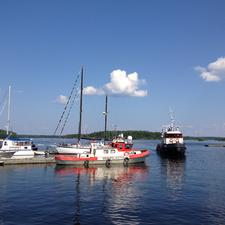
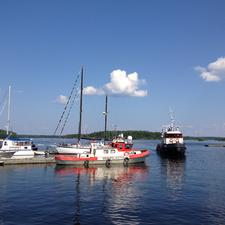
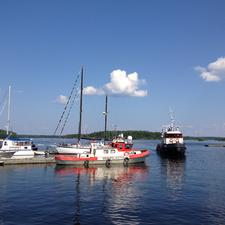
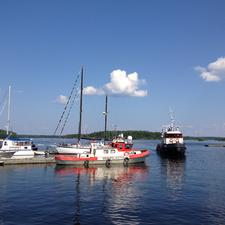
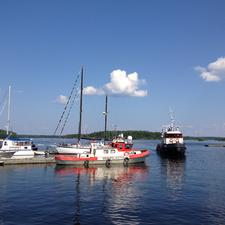
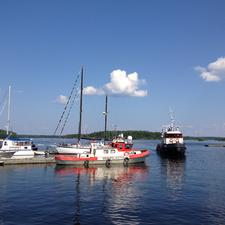

In [16]:
image_matrix(X, scale=.3)

## The `cmap` parameter

Use parameter `cmap` to display grayscale images in pseudo-colors.


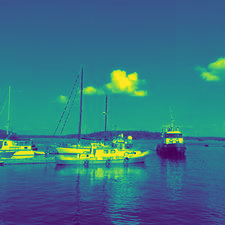
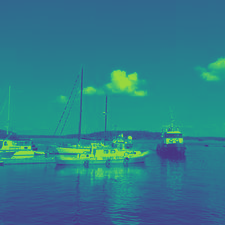
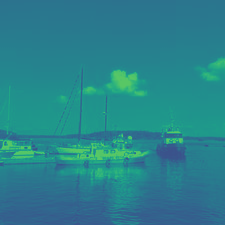
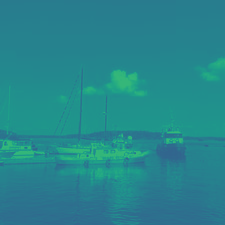
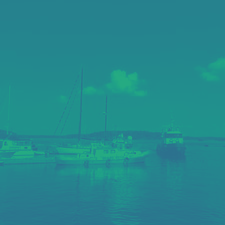
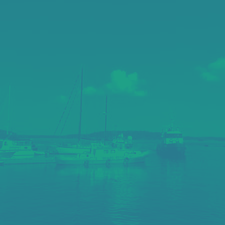

In [17]:
image_matrix(X2, cmap="viridis", norm=False)